In [371]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas.io.json import json_normalize

# !conda install -c conda-forge geopy --yes # uncomment if you haven't run geopy before.
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from bs4 import BeautifulSoup

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [374]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON are 43.6534817, -79.3839347.


In [373]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(url,'lxml')
from IPython.display import display_html

#Read Table String
tab = str(soup.table)
data = pd.read_html(tab)
data_fm=data[0]
data_fm.head(15)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,NaN
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [7]:
#Drop Rows with Not assigned in Borough
data_f1 = data_fm.dropna()
data_f1.reset_index(drop=True, inplace=True)
data_f1

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [9]:
# Latitude Longitude Data Available for Toronto Postal Codes
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [375]:
# Merge Location Data to respective Neighborhoods
neighbourhoods = pd.merge(data_f1,lat_lon,on='Postal Code')
neighbourhoods.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## Explore all neighbourhoods in Toronto

In [376]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [378]:
toronto_venues = getNearbyVenues(names=neighbourhoods['Neighborhood'],
                                   latitudes=neighbourhoods['Latitude'],
                                   longitudes=neighbourhoods['Longitude']
                                  )



In [379]:
# Review results
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [380]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

toronto_venues.shape

There are 275 uniques categories.


(2130, 7)

## Analyze Each Neighbourhood

In [383]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(10)

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [384]:
#Groupby Neighbouhoods and take the mean for each category
toronto_grouped=toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

In [385]:
#Top 10 neighborhoods with Indian Restaurants. 
toronto_indian_rest = toronto_grouped[['Neighborhood','Indian Restaurant']].nlargest(10,'Indian Restaurant')
toronto_indian_rest.set_index('Neighborhood', inplace=True)
toronto_indian_rest.head()

,Indian Restaurant
Neighborhood,
"Dorset Park, Wexford Heights, Scarborough Town Centre",0.250000
Thorncliffe Park,0.105263
"The Annex, North Midtown, Yorkville",0.045455
"Bedford Park, Lawrence Manor East",0.040000
Davisville,0.027778


Text(0.5, 1.0, 'Indian Restaurants by Neigborhoods')

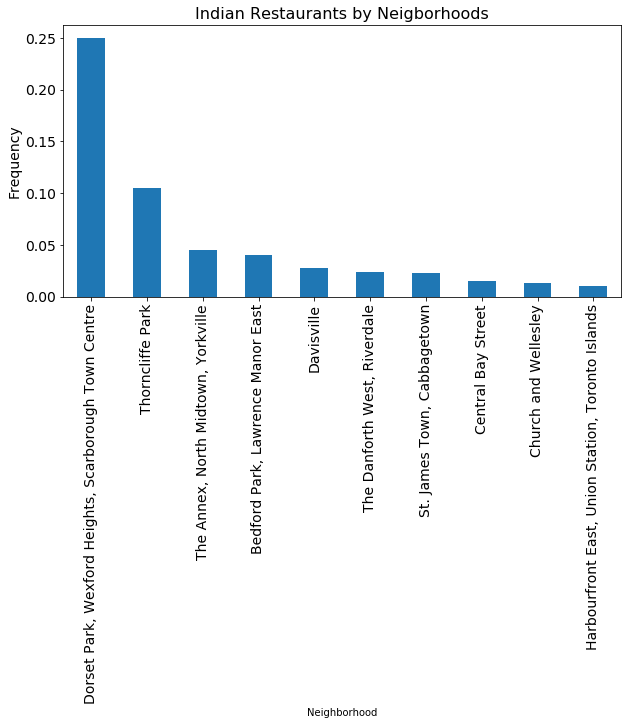

In [386]:
ax=toronto_indian_rest.plot(kind='bar', figsize=(10,5),fontsize=14, legend=False)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Indian Restaurants by Neigborhoods', fontsize=16)

### Lets Explore the Top 2 Neiborhoods with highest Indian Restaurants Further

In [456]:
toronto_select_neigh = toronto_grouped.loc[[23,82],:]
toronto_select_neigh.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
23,"Dorset Park, Wexford Heights, Scarborough Town...",0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [457]:
# We explore top 5 venues in these selected neighborhoods
num_top_venues = 5

for hood in toronto_select_neigh['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_select_neigh[toronto_select_neigh['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Dorset Park, Wexford Heights, Scarborough Town Centre----
                    venue  freq
0       Indian Restaurant  0.25
1      Light Rail Station  0.12
2   Vietnamese Restaurant  0.12
3               Pet Store  0.12
4  Thrift / Vintage Store  0.12


----Thorncliffe Park----
                       venue  freq
0          Indian Restaurant  0.11
1                Yoga Studio  0.05
2  Middle Eastern Restaurant  0.05
3                Coffee Shop  0.05
4             Discount Store  0.05




### Lets obtain Top 10 Venues for Toronto Neighborhoods (Useful for later analysis)

In [391]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [392]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Skating Rink,Breakfast Spot,Donut Shop,Doner Restaurant,Dog Run,Drugstore,Curling Ice,Distribution Center
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Skating Rink,Gym,Pharmacy,Athletics & Sports,Pub,Sandwich Place,Deli / Bodega,Cupcake Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Pizza Place,Shopping Mall,Bridal Shop,Sandwich Place,Deli / Bodega,Ice Cream Shop,Restaurant,Supermarket
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
4,"Bedford Park, Lawrence Manor East",Thai Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Restaurant,Sushi Restaurant,Greek Restaurant,Liquor Store,Juice Bar,Indian Restaurant


## Examine All Toronto Neighborhoods Further through K=Means Clustering 

In [393]:
# # set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [397]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = neighbourhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [398]:
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Park,Food & Drink Shop,Women's Store,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,3.0,Coffee Shop,Pizza Place,French Restaurant,Hockey Arena,Portuguese Restaurant,Dessert Shop,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3.0,Coffee Shop,Park,Pub,Bakery,Theater,Café,Restaurant,Breakfast Spot,Yoga Studio,Hotel
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.0,Accessories Store,Clothing Store,Furniture / Home Store,Event Space,Boutique,Vietnamese Restaurant,Coffee Shop,Athletics & Sports,Miscellaneous Shop,Arts & Crafts Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3.0,Coffee Shop,Yoga Studio,College Cafeteria,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,College Auditorium


In [399]:
#Drop any rows with NaN values for Cluster Labels
toronto_merged = toronto_merged[toronto_merged['Cluster Labels'].notna()]

In [400]:
#Convert Cluster Labels from float to int for mapping purpose
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [401]:
toronto_merged.dtypes

Postal Code                object
Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [402]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters for Similar Neighborhoods

In [403]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,1,Fast Food Restaurant,Women's Store,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
8,East York,1,Pizza Place,Fast Food Restaurant,Bank,Breakfast Spot,Pharmacy,Gym / Fitness Center,Gastropub,Athletics & Sports,Intersection,Dim Sum Restaurant
50,North York,1,Pizza Place,Women's Store,Diner,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
63,York,1,Grocery Store,Pizza Place,Bus Line,Convenience Store,Women's Store,Dim Sum Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
70,Etobicoke,1,Pizza Place,Coffee Shop,Intersection,Middle Eastern Restaurant,Sandwich Place,Chinese Restaurant,Distribution Center,Discount Store,Diner,Cupcake Shop
77,Etobicoke,1,Bus Line,Pizza Place,Sandwich Place,Mobile Phone Shop,Women's Store,Dessert Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store


In [404]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Etobicoke,2,Brewery,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store,Electronics Store


In [409]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,3,Coffee Shop,Pizza Place,French Restaurant,Hockey Arena,Portuguese Restaurant,Dessert Shop,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega
2,Downtown Toronto,3,Coffee Shop,Park,Pub,Bakery,Theater,Café,Restaurant,Breakfast Spot,Yoga Studio,Hotel
3,North York,3,Accessories Store,Clothing Store,Furniture / Home Store,Event Space,Boutique,Vietnamese Restaurant,Coffee Shop,Athletics & Sports,Miscellaneous Shop,Arts & Crafts Store
4,Downtown Toronto,3,Coffee Shop,Yoga Studio,College Cafeteria,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,College Auditorium
7,North York,3,Japanese Restaurant,Gym,Café,Asian Restaurant,Beer Store,Coffee Shop,Restaurant,Gym / Fitness Center,Chinese Restaurant,Supermarket
9,Downtown Toronto,3,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Cosmetics Shop,Bubble Tea Shop,Italian Restaurant,Japanese Restaurant,Restaurant,Tea Room
12,Scarborough,3,Golf Course,Bar,Women's Store,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
13,North York,3,Japanese Restaurant,Gym,Café,Asian Restaurant,Beer Store,Coffee Shop,Restaurant,Gym / Fitness Center,Chinese Restaurant,Supermarket
14,East York,3,Park,Curling Ice,Beer Store,Pharmacy,Video Store,Skating Rink,Cosmetics Shop,Bus Stop,Dessert Shop,Dance Studio
15,Downtown Toronto,3,Café,Coffee Shop,Cocktail Bar,Restaurant,American Restaurant,Gastropub,Cosmetics Shop,Creperie,Italian Restaurant,Gym


In [406]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,4,Park,Food & Drink Shop,Women's Store,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
10,North York,4,Park,Asian Restaurant,Japanese Restaurant,Pub,Dim Sum Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
16,York,4,Park,Hockey Arena,Field,Trail,Dim Sum Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
21,York,4,Park,Pool,Women's Store,Gift Shop,Creperie,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
35,East York,4,Park,Coffee Shop,Pizza Place,Convenience Store,Dim Sum Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
49,North York,4,Park,Basketball Court,Bakery,Construction & Landscaping,Donut Shop,Doner Restaurant,Dog Run,Drugstore,Distribution Center,Curling Ice
61,Central Toronto,4,Park,Bus Line,Swim School,Dim Sum Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Cupcake Shop
64,York,4,Park,Convenience Store,Women's Store,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
66,North York,4,Construction & Landscaping,Park,Bank,Convenience Store,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
98,Etobicoke,4,Park,River,Pool,Dessert Shop,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dim Sum Restaurant


In [407]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,5,Baseball Field,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Curling Ice
101,Etobicoke,5,Construction & Landscaping,Baseball Field,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store


In [408]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


### Clustering confirmed that our three highest indian restaurant neighborhoods are in-fact similar to each other. They all fall under the same cluster. 

## Apply Predictive Model - Support Vector Machine Regressor on Toronto Data Set

In [411]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = toronto_grouped.drop(['Neighborhood','Indian Restaurant'], axis=1)
y = toronto_grouped['Indian Restaurant']

In [412]:
X.shape

(96, 273)

In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [414]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.34235811, -0.10259784, -0.10259784, ..., -0.10259784,
        -0.15560117, -0.11291647],
       [-0.34235811, -0.10259784, -0.10259784, ..., -0.10259784,
        -0.15560117, -0.11291647],
       [-0.34235811, -0.10259784, -0.10259784, ..., -0.10259784,
        -0.15560117, -0.11291647],
       [-0.34235811, -0.10259784, -0.10259784, ..., -0.10259784,
        -0.15560117, -0.11291647],
       [-0.34235811, -0.10259784, -0.10259784, ..., -0.10259784,
        -0.15560117, -0.11291647]])

In [415]:
# We use SVR Regressor
from sklearn.svm import SVR

#We utilize sckhit-learn parameter tuning function GridSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

clf = GridSearchCV(SVR(kernel = 'rbf'), cv=5,param_grid=[{"C": [1, 10, 100, 1000],
                               "gamma": [0.001,0.0001], 'kernel':['rbf']}])

clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [416]:
clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': [{'C': [1, 10, 100, 1000],
   'gamma': [0.001, 0.0001],
   'kernel': ['rbf']}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [417]:
clf.cv_results_

{'mean_fit_time': array([0.0036202 , 0.00338354, 0.00318651, 0.0026134 , 0.00246119,
        0.00250192, 0.00310097, 0.00250082]),
 'std_fit_time': array([0.00059131, 0.00059074, 0.00048861, 0.00029986, 0.00022745,
        0.00046033, 0.00052332, 0.00022968]),
 'mean_score_time': array([0.00252056, 0.00191712, 0.00214067, 0.00176778, 0.0017065 ,
        0.00170345, 0.00180664, 0.00161886]),
 'std_score_time': array([0.00087235, 0.00018829, 0.0001671 , 0.00015923, 0.00019078,
        0.0001885 , 0.00020661, 0.00010274]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001, 0.001,
                    0.0001],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(da

In [418]:
# Best model which gave highest score 
model=clf.best_estimator_ 
model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [419]:
y_hat = model.predict(X_test)
y_hat

array([0.09815226, 0.0903729 , 0.09270096, 0.09848105, 0.09741645,
       0.09683896, 0.10178313, 0.0961738 , 0.09272486, 0.09704834,
       0.09766856, 0.09454423, 0.09491626, 0.08439831, 0.10029358,
       0.09777671, 0.08470816, 0.0977521 , 0.0909375 , 0.09586865])

## Model Evaluation

In [420]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print('Mean Square Error of SVM regressor is {}, which is reasonably low'.format(mean_squared_error(y_test, y_hat)))

Mean Square Error of SVM regressor is 0.008827782524857811, which is reasonably low


## EXPLORING NEIGHBORHOODS IN CALGARY, ALBERTA

In [421]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary')
result = {}
soup = BeautifulSoup(res.content,'lxml')
tables = soup.find_all('table',{'class':'wikitable'})
table = tables[0].find('tbody')
districtLinks = table.find_all('a',href=True)

for link in districtLinks:
    if link.getText() in link.attrs.get('title','') or link.attrs.get('title','') in link.getText():
        district = link.attrs.get('title','')
        if district:
            url = link.attrs.get('href', '')
        else:
            continue
    else:
        continue
    try:
        res = requests.get("https://en.wikipedia.org/{}".format(url))
    except:
        continue
    else:
        soup = BeautifulSoup(res.content, 'lxml')
        try:
            tables = soup.find_all('table',{'class':'infobox geography vcard'})
            table = tables[0].find('tbody')
        except:
            continue
        else:
            for row in table.find_all('tr',{'class':'mergedbottomrow'}):
                geoLink = row.find('span',{'class': 'geo'}) # 'plainlinks nourlexpansion'
                locationSplit = geoLink.getText().split("; ")
                result.update({district : {"Latitude ": locationSplit[0], "Longitude":locationSplit[1]}})


print(result)
    

{'Abbeydale, Calgary': {'Latitude ': '51.06083', 'Longitude': '-113.92778'}, 'Acadia, Calgary': {'Latitude ': '50.96722', 'Longitude': '-114.05917'}, 'Albert Park/Radisson Heights, Calgary': {'Latitude ': '51.04556', 'Longitude': '-113.98944'}, 'Altadore, Calgary': {'Latitude ': '51.01806', 'Longitude': '-114.10056'}, 'Alyth/Bonnybrook, Calgary': {'Latitude ': '51.02056', 'Longitude': '-114.02389'}, 'Applewood Park, Calgary': {'Latitude ': '51.04472', 'Longitude': '-113.92833'}, 'Arbour Lake, Calgary': {'Latitude ': '51.13333', 'Longitude': '-114.20444'}, 'Aspen Woods, Calgary': {'Latitude ': '51.04333', 'Longitude': '-114.19333'}, 'Banff Trail, Calgary': {'Latitude ': '51.07528', 'Longitude': '-114.11278'}, 'Bankview, Calgary': {'Latitude ': '51.03500', 'Longitude': '-114.09917'}, 'Bayview, Calgary': {'Latitude ': '50.97528', 'Longitude': '-114.11444'}, 'Beddington Heights, Calgary': {'Latitude ': '51.12750', 'Longitude': '-114.07694'}, 'Bel-Aire, Calgary': {'Latitude ': '50.99944', '

In [424]:
# We saved the above data as csv file so we don't have retrieve it from wikipedia everytime.
# df.to_csv('calgary.csv')
calgary = pd.read_csv('calgary.csv')
calgary.reset_index(drop=True)
calgary['Neighborhood'] = calgary['Neighborhood'].str.split(',').str[0]
calgary.head()

,Neighborhood,Latitude,Longitude
0,Abbeydale,51.06,-113.93
1,Acadia,50.97,-114.06
2,Albert Park/Radisson Heights,51.05,-113.99
3,Altadore,51.02,-114.10
4,Alyth/Bonnybrook,51.02,-114.02


In [425]:
print('Calgary has {} neigbhorhood'.format(len(calgary['Neighborhood'].unique())))

Calgary has 196 neigbhorhood


In [426]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="ab_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary, AB are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary, AB are 51.0534234, -114.0625892.


## Map of Calgary with Neigborhoods Superimposed

In [427]:
# Creating map of Calgary using latitude and longitude values
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(calgary['Latitude'], calgary['Longitude'], calgary['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

## Exploring Calgary Neighborhoods on FourSquare

In [428]:
CLIENT_ID = 'JLCEH3EWZIT0ZXAYUM2NO1VCT004GKPDVSDMO05CUHT3301M' 
CLIENT_SECRET = 'O0OVOIYNS1LVEIJHZUZMC4GWM34RZPR1Z0ZTLSXYTJWR0XVJ' 
VERSION = '20200520' # Foursquare API version

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

print('Client ID is {} and Client Secret is {}'.format(CLIENT_ID, CLIENT_SECRET))

Client ID is JLCEH3EWZIT0ZXAYUM2NO1VCT004GKPDVSDMO05CUHT3301M and Client Secret is O0OVOIYNS1LVEIJHZUZMC4GWM34RZPR1Z0ZTLSXYTJWR0XVJ


### Explore All Neighborhoods in Calgary

In [429]:
calgary_venues = getNearbyVenues(names=calgary['Neighborhood'],
                                   latitudes=calgary['Latitude'],
                                   longitudes=calgary['Longitude'], radius = radius
                                  )

In [431]:
calgary_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbeydale,51.06,-113.93,Subway,51.059239,-113.934423,Sandwich Place
1,Abbeydale,51.06,-113.93,Mac's,51.059376,-113.934425,Convenience Store
2,Abbeydale,51.06,-113.93,roadside pub,51.059277,-113.934529,Wings Joint
3,Abbeydale,51.06,-113.93,Vanity Fitness,51.062982,-113.926238,Health & Beauty Service
4,Acadia,50.97,-114.06,Acadia Aquatic & Fitness Centre,50.973297,-114.059984,Gym / Fitness Center


In [432]:
print('There are {} unique venues in Calgary'.format(len(calgary_venues['Venue Category'].unique())))

There are 200 unique venues in Calgary


In [433]:
calgary_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbeydale,4,4,4,4,4,4
Acadia,3,3,3,3,3,3
Albert Park/Radisson Heights,11,11,11,11,11,11
Altadore,5,5,5,5,5,5
Alyth/Bonnybrook,4,4,4,4,4,4
Applewood Park,7,7,7,7,7,7
Arbour Lake,28,28,28,28,28,28
Aspen Woods,4,4,4,4,4,4
Banff Trail,3,3,3,3,3,3


In [434]:
# one hot encoding
calgary_onehot = pd.get_dummies(calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
calgary_onehot['Neighborhood'] = calgary_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [calgary_onehot.columns[-1]] + list(calgary_onehot.columns[:-1])
calgary_onehot = calgary_onehot[fixed_columns]

calgary_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport Food Court,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Bistro,Board Shop,Bookstore,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Station,Business Service,Café,Camera Store,Candy Store,Carpet Store,Casino,Cheese Shop,Child Care Service,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Embassy / Consulate,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Noodle House,Organic Grocery,Other Repair Shop,Paintball Field,Park,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoothie Shop,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abbeydale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abbeydale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abbeydale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [435]:
#Groupby Neighbouhoods and take the mean for each category
calgary_grouped=calgary_onehot.groupby('Neighborhood').sum().reset_index()
calgary_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport Food Court,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Bistro,Board Shop,Bookstore,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Station,Business Service,Café,Camera Store,Candy Store,Carpet Store,Casino,Cheese Shop,Child Care Service,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Embassy / Consulate,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Noodle House,Organic Grocery,Other Repair Shop,Paintball Field,Park,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoothie Shop,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Abbeydale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Acadia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albert Park/Radisson Heights,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [436]:
#Indian Resturants in Calgary 
calgary_indian_restaurant = calgary_onehot.groupby('Neighborhood').sum().reset_index()
calgary_indian_restaurant[['Neighborhood','Indian Restaurant']]

,Neighborhood,Indian Restaurant
0,Abbeydale,0
1,Acadia,0
2,Albert Park/Radisson Heights,1
3,Altadore,0
4,Alyth/Bonnybrook,0
5,Applewood Park,0
6,Arbour Lake,1
7,Aspen Woods,0
8,Banff Trail,0
9,Bankview,2


### Top 10 venues in Calgary by Neighbourhood

In [437]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
calgary_venues_sorted = pd.DataFrame(columns=columns)
calgary_venues_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    calgary_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], num_top_venues)

calgary_venues_sorted.head(150)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbeydale,Wings Joint,Convenience Store,Health & Beauty Service,Sandwich Place,Dog Run,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Embassy / Consulate
1,Acadia,Pool,Gym / Fitness Center,Recreation Center,Women's Store,Discount Store,Fast Food Restaurant,Falafel Restaurant,Event Space,Embassy / Consulate,Electronics Store
2,Albert Park/Radisson Heights,Pizza Place,Train Station,Restaurant,Indian Restaurant,Sandwich Place,Asian Restaurant,Gourmet Shop,Bakery,Convenience Store,African Restaurant
3,Altadore,Café,Sporting Goods Shop,Brewery,Massage Studio,Bar,Women's Store,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
4,Alyth/Bonnybrook,Construction & Landscaping,Clothing Store,Other Repair Shop,Restaurant,Women's Store,Dog Run,Fast Food Restaurant,Falafel Restaurant,Event Space,Embassy / Consulate
5,Applewood Park,Park,Liquor Store,Pizza Place,Coffee Shop,Vietnamese Restaurant,Discount Store,Fast Food Restaurant,Falafel Restaurant,Event Space,Embassy / Consulate
6,Arbour Lake,Coffee Shop,Café,Fast Food Restaurant,Yoga Studio,Smoothie Shop,Skating Rink,Breakfast Spot,Brewery,Restaurant,Clothing Store
7,Aspen Woods,Light Rail Station,Football Stadium,Supermarket,Dry Cleaner,Food Court,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
8,Banff Trail,High School,Park,Golf Course,Women's Store,Dog Run,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Embassy / Consulate
9,Bankview,Indian Restaurant,Sandwich Place,Pizza Place,Bookstore,Spa,Lawyer,Mexican Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Breakfast Spot


In [438]:
# The number of venues for both cites are different
print('Toronto has {} venues'.format((len(toronto_onehot.columns))))
print('Calgary has {} venues'.format((len(calgary_onehot.columns))))

Toronto has 275 venues
Calgary has 200 venues


### Since we trained the model on Toronto Data Set, we will ensure those columns are present in Calgary venues

In [439]:
#Merge Toronto Data with Calgary
merge_data=pd.DataFrame(columns=toronto_grouped.columns).merge(calgary_grouped,how='outer') 

# Replace NaN values with 0 for venues that are not common between the datasets. 
merge_data.fillna(0,inplace=True)
merge_data.head()

,Afghan Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Antique Shop,Aquarium,Art Museum,Auto Workshop,Baby Store,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Store,Belgian Restaurant,Bike Shop,Boat or Ferry,Boutique,Burrito Place,Bus Line,Bus Stop,Butcher,Cable Car,Cafeteria,Cajun / Creole Restaurant,Caribbean Restaurant,Chocolate Shop,Church,Climbing Gym,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Convention Center,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dessert Shop,Dim Sum Restaurant,Distribution Center,Doner Restaurant,Donut Shop,Dumpling Restaurant,Ethiopian Restaurant,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Fountain,Fruit & Vegetable Store,Garden Center,General Entertainment,General Travel,German Restaurant,Gluten-free Restaurant,Gym Pool,Hakka Restaurant,Harbor / Marina,Health Food Store,Historic Site,Hospital,Hotel Bar,Indonesian Restaurant,Intersection,Irish Pub,Jazz Club,Juice Bar,Lingerie Store,Luggage Store,Mac & Cheese Joint,Martial Arts Dojo,Medical Center,Men's Store,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Nightclub,Office,Opera House,Optical Shop,Other Great Outdoors,Performing Arts Venue,Plane,Poke Place,Portuguese Restaurant,Poutine Place,Roof Deck,Sake Bar,Sculpture Garden,Shoe Store,Smoke Shop,Snack Place,Social Club,Soup Place,South American Restaurant,Speakeasy,Stationery Store,Strip Club,Summer Camp,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Theme Restaurant,Transportation Service,Video Store,Warehouse Store,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,Airport Food Court,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Bistro,Board Shop,Bookstore,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Station,Business Service,Café,Camera Store,Candy Store,Carpet Store,Casino,Cheese Shop,Child Care Service,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Embassy / Consulate,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Noodle House,Organic Grocery,Other Repair Shop,Paintball Field,Park,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich

In [440]:
#This will ensure Toronto SVM model features are the same when applied on Calgary data. 
calgary_final_data=merge_data[toronto_grouped.columns].copy()
calgary_final_data.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Abbeydale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Apply SVM Model from Toronto data set onto Calgary Data Set 

In [441]:
X_calgary=calgary_final_data.drop(['Neighborhood','Indian Restaurant'],axis=1)
y_current=calgary_final_data['Indian Restaurant']

In [443]:
y_hat=model.predict(X_calgary)

In [444]:
calgary_results=pd.DataFrame([calgary_final_data['Neighborhood'],y_current,y_hat], index=['Neighborhood',"Current", "Predicted"])
calgary_results_trans=calgary_results.T
calgary_results_trans.head()

,Neighborhood,Current,Predicted
0,Abbeydale,0,0.0845083
1,Acadia,0,0.102095
2,Albert Park/Radisson Heights,1,0.0521729
3,Altadore,0,0.071621
4,Alyth/Bonnybrook,0,0.0619673


In [445]:
# Neighborhoods with the highest difference between current and predicted frequency are top recommendations
calgary_results_trans['Delta'] = (calgary_results_trans['Predicted'] - calgary_results_trans['Current'])
calgary_results_trans.head()

,Neighborhood,Current,Predicted,Delta
0,Abbeydale,0,0.0845083,0.0845083
1,Acadia,0,0.102095,0.102095
2,Albert Park/Radisson Heights,1,0.0521729,-0.947827
3,Altadore,0,0.071621,0.071621
4,Alyth/Bonnybrook,0,0.0619673,0.0619673


### Top 5 Recommended Neighborhoods in Calgary to open an Indian Restaurant 

In [446]:
#Top 5 neighborhoods to consider opening an Indian Restaurant in Calgary. 
calgary_recommendations = calgary_results_trans.sort_values(by='Delta', ascending=False).head()
calgary_recommendations.head()

,Neighborhood,Current,Predicted,Delta
154,Southview,0,0.296086,0.296086
144,Shaganappi,0,0.181105,0.181105
146,Shawnessy,0,0.175498,0.175498
7,Aspen Woods,0,0.162445,0.162445
35,Coach Hill,0,0.162235,0.162235


In [447]:
# For mapping purpose we amalgamate lat & long data into one single dataframe
calgary_neighbourhoods = pd.merge(calgary,calgary_recommendations, on='Neighborhood').sort_values(by='Delta',ascending=False)
calgary_neighbourhoods.head()                                  

,Neighborhood,Latitude,Longitude,Current,Predicted,Delta
4,Southview,51.03,-113.99,0,0.296086,0.296086
2,Shaganappi,51.04,-114.13,0,0.181105,0.181105
3,Shawnessy,50.91,-114.08,0,0.175498,0.175498
0,Aspen Woods,51.04,-114.19,0,0.162445,0.162445
1,Coach Hill,51.06,-114.18,0,0.162235,0.162235


In [455]:
# Map of Recommended Neighborhoods in Calgary for Opening an Indian Restaurant
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(calgary_neighbourhoods['Latitude'], calgary_neighbourhoods['Longitude'], calgary_neighbourhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

In [458]:
toronto_final= neighborhoods_venues_sorted.loc[[23,82],:]
toronto_final

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,3,"Dorset Park, Wexford Heights, Scarborough Town...",Indian Restaurant,Pet Store,Furniture / Home Store,Light Rail Station,Vietnamese Restaurant,Chinese Restaurant,Thrift / Vintage Store,Curling Ice,Dance Studio,Deli / Bodega
82,3,Thorncliffe Park,Indian Restaurant,Yoga Studio,Supermarket,Gas Station,Grocery Store,Gym,Fast Food Restaurant,Discount Store,Middle Eastern Restaurant,Coffee Shop


In [449]:
calgary_final = pd.merge(calgary_venues_sorted, calgary_neighbourhoods, how='inner', on=['Neighborhood']).drop(columns=['Latitude','Longitude','Current', 'Predicted','Delta'])
calgary_final

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aspen Woods,Light Rail Station,Football Stadium,Supermarket,Dry Cleaner,Food Court,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
1,Coach Hill,Vietnamese Restaurant,Convenience Store,Bar,Embassy / Consulate,Gas Station,Women's Store,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant
2,Shaganappi,Pizza Place,Café,Light Rail Station,Asian Restaurant,Convenience Store,Coffee Shop,Pub,Mediterranean Restaurant,Seafood Restaurant,Bistro
3,Shawnessy,Filipino Restaurant,Pet Store,Convenience Store,Gas Station,Women's Store,Drugstore,Fast Food Restaurant,Falafel Restaurant,Event Space,Embassy / Consulate
4,Southview,Playground,Vietnamese Restaurant,Furniture / Home Store,Thrift / Vintage Store,Dog Run,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Embassy / Consulate


### One common observation between the two cities is that these Neighborhoods have other Asian Venues in place, this further supports our SVM model recommendations for Calgary